## Clustering Introduction

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import k_means, KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle



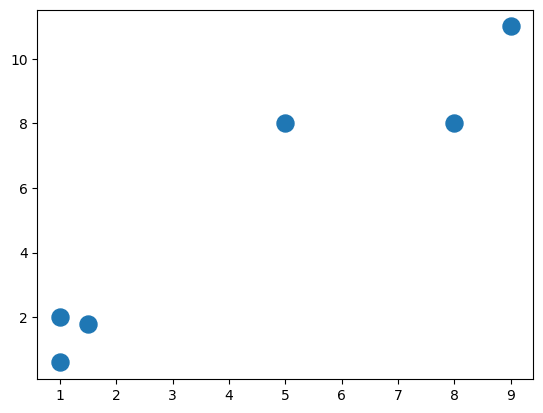

In [8]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

plt.scatter(x[:,0],x[:,1],s=150)
plt.show()

[[1.16666667 1.46666667]
 [8.5        9.5       ]
 [5.         8.        ]]
[0 0 2 1 0 1]


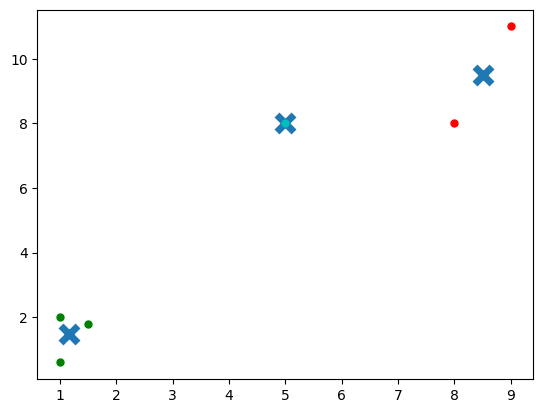

In [19]:
model = KMeans(n_clusters=3)
model.fit(x)

centroids = model.cluster_centers_
print(centroids)
labels = model.labels_
print(labels)

colors = ['g.','r.','c.','b.','k.','o.']
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5)

In [71]:
df = pd.read_excel('titanic.xls')
df.drop(['name','body'],axis=1,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [72]:
df.fillna(0,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [ ]:
############ Not Working

label_encoder = preprocessing.LabelEncoder()
sex_label = label_encoder.fit_transform(df['sex'])
embarked_label = label_encoder.fit_transform(df['embarked'])
df.drop(['sex','embarked'],axis=1,inplace=True)
df['sex'] = sex_label
df['embarked'] = embarked_label

df.head()


In [78]:
def handle_categorical_data(df):
    columns = df.columns.values
    for column in columns:
        text_vals = {}
        def convert_to_int(val):
            return text_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_vals:
                    text_vals[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int,df[column]))
            
    return df
            
            
            
    
df = handle_categorical_data(df)
